In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("data.csv")

# Display basic info
print("Initial Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Data Cleaning
# 1. Remove duplicate rows
df = df.drop_duplicates()

# 2. Drop rows with missing values
df = df.dropna()

# 3. Remove unrealistic values (basic cleaning)
df = df[df['bedrooms'] > 0]
df = df[df['bathrooms'] > 0]
df = df[df['sqft_living'] > 0]

print("\nShape after cleaning:", df.shape)

# Preview cleaned data
df.head()


Saving data.csv to data (1).csv
Initial Shape: (4600, 18)

Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Shape after cleaning: (4598, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 823542301570.9974
R2 Score: 0.051919497357107436


Accuracy: 0.7315217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       456
           1       0.76      0.69      0.72       464

    accuracy                           0.73       920
   macro avg       0.73      0.73      0.73       920
weighted avg       0.73      0.73      0.73       920



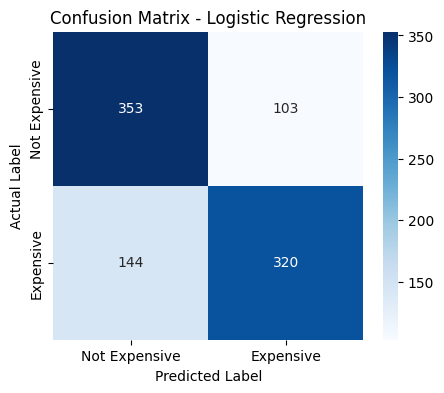

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create binary target variable
df['expensive'] = (df['price'] > df['price'].median()).astype(int)

# Features and target
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
y = df['expensive']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Not Expensive', 'Expensive'],
    yticklabels=['Not Expensive', 'Expensive']
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
